In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('data/iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df=data.copy()

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## **Data Visualization**

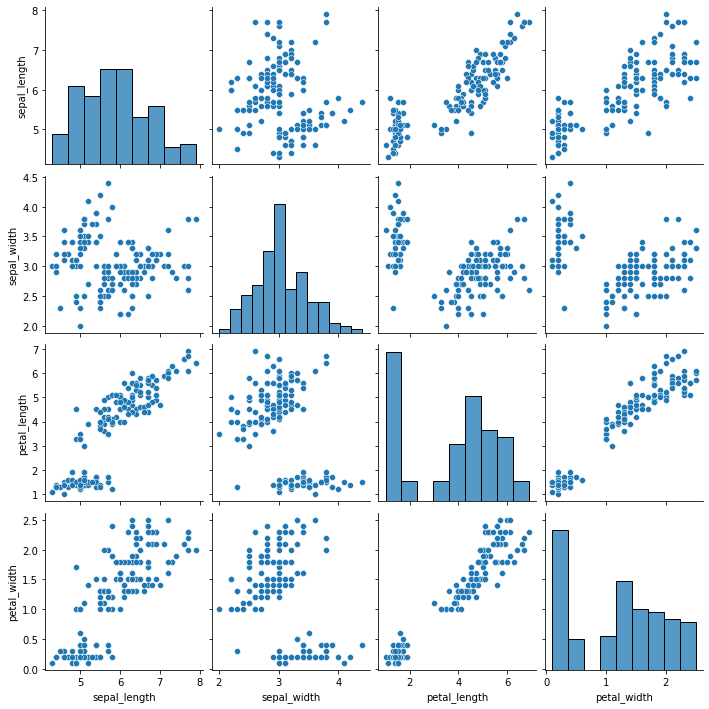

In [38]:
sns.pairplot(data=data)
#plt.title('Pairplot')
plt.show()

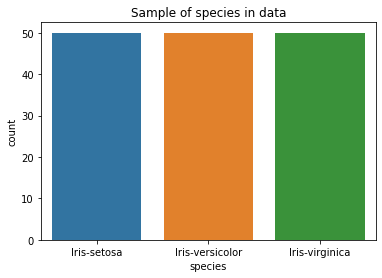

In [29]:
sns.countplot(x='species',data=data)
plt.title('Sample of species in data')
plt.show()

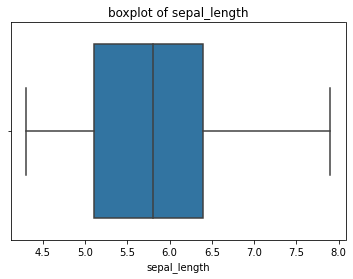

In [31]:
sns.boxplot(x='sepal_length',data=data)
plt.title('boxplot of sepal_length')
plt.show()

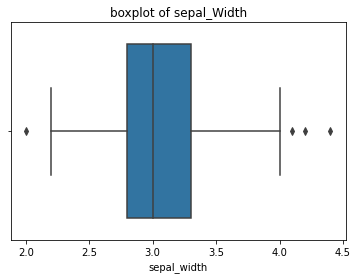

In [30]:
sns.boxplot(x='sepal_width',data=data)
plt.title('boxplot of sepal_Width')
plt.show()

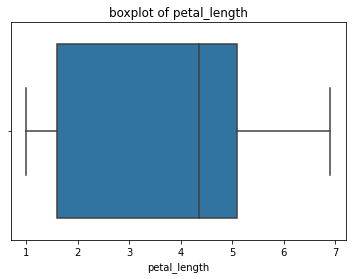

In [32]:
sns.boxplot(x='petal_length',data=data)
plt.title('boxplot of petal_length')
plt.show()

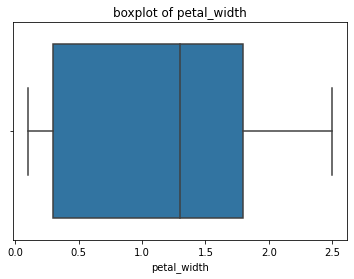

In [33]:
sns.boxplot(x='petal_width',data=data)
plt.title('boxplot of petal_width')
plt.show()

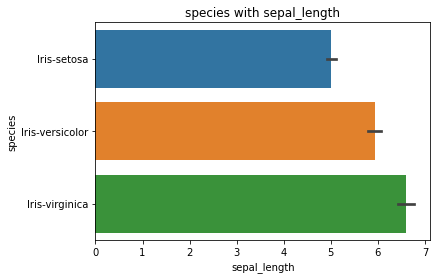

In [43]:
sns.barplot(x='sepal_length',y='species',data=data)
plt.title('species with sepal_length')
plt.show()

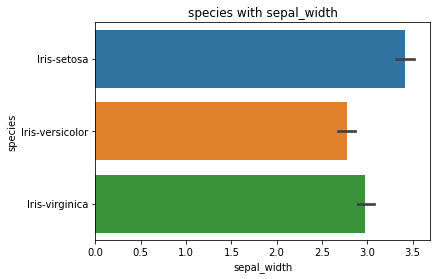

In [44]:
sns.barplot(x='sepal_width',y='species',data=data)
plt.title('species with sepal_width')
plt.show()

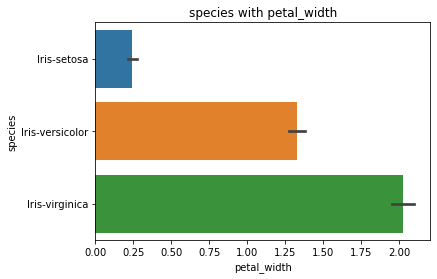

In [45]:
sns.barplot(x='petal_width',y='species',data=data)
plt.title('species with petal_width')
plt.show()

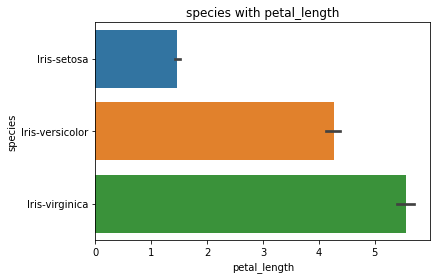

In [46]:
sns.barplot(x='petal_length',y='species',data=data)
plt.title('species with petal_length')
plt.show()

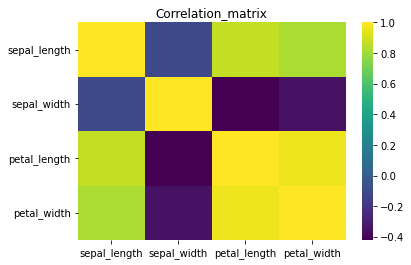

In [51]:
corr_matrix=data.drop('species',axis=1).corr()
sns.heatmap(corr_matrix,cmap="viridis")
plt.title('Correlation_matrix')
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
df['species']=label_enc.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
X=df.drop('species',axis=1)
y=df['species']

In [14]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((120, 4), (30, 4))

In [15]:
from sklearn.preprocessing import StandardScaler
#scaling the features 
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [16]:
X_train_scaled.shape,y_train.shape,X_test_scaled.shape,y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#from xgboost import XGBClassifier

def train_and_test(x_train,y_train,x_test,y_test):
    
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(max_depth=5),
        'Random Forest': RandomForestClassifier(n_estimators=100),
        'Support Vector Machine': SVC(kernel='rbf'),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes': GaussianNB(),
        #'Neural Network': MLPClassifier(hidden_layer_sizes=(100,)),
        'AdaBoost': AdaBoostClassifier(n_estimators=100),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
        #'XGBoost': XGBClassifier(n_estimators=100)
    }
    
    accuracy_={}
    trained_models={}
    
    for name,model in classifiers.items():
        print(f'Training : {name}')
        model.fit(x_train,y_train)
        
        #print(f'Testing : ')
        
        trained_models[name]=model

        y_pred=model.predict(x_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        accuracy_[name]=accuracy
        
    return  accuracy_,trained_models

    
        
        


In [18]:
accuracy_,trained_models=train_and_test(X_train_scaled,y_train,X_test_scaled,y_test)


Training : Logistic Regression
Training : Decision Tree
Training : Random Forest
Training : Support Vector Machine
Training : K-Nearest Neighbors
Training : Naive Bayes
Training : AdaBoost
Training : Gradient Boosting


In [19]:
acc_df = pd.DataFrame.from_dict(accuracy_, orient='index', columns=['Accuracy'])
acc_df.reset_index(inplace=True)
acc_df.rename(columns={'index': 'Model'}, inplace=True)
acc_df.sort_values(by='Accuracy', ascending=False).style.highlight_max(axis=0)

,Model,Accuracy
0,Logistic Regression,1.000000
1,Decision Tree,1.000000
2,Random Forest,1.000000
3,Support Vector Machine,1.000000
4,K-Nearest Neighbors,1.000000
5,Naive Bayes,1.000000
6,AdaBoost,1.000000
7,Gradient Boosting,1.000000


In [20]:
best_model_key=acc_df.loc[acc_df['Accuracy'].idxmax()]
best_model=trained_models[best_model_key[0]]
best_model

LogisticRegression(max_iter=1000)

In [21]:
#saving the model and the scaler

import pickle

with open(best_model_key[0]+'.pkl','wb') as f:
    pickle.dump(best_model,f)
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already trained and obtained predictions from a classification model
y_true = y_test
y_pred = best_model.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy:', accuracy)

# Calculate precision score
precision = precision_score(y_true, y_pred, average='weighted')
print('Precision:', precision)

# Calculate recall score
recall = recall_score(y_true, y_pred, average='weighted')
print('Recall:', recall)

# Calculate F1-score
f1 = f1_score(y_true, y_pred, average='weighted')
print('F1-score:', f1)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
